# Project Objectives:

Our project's main objective is to develop and use machine learning models that can predict diamond prices accurately and in high precision. This passion has been raised because of the significant economic and cultural significance that diamonds hold.  

### Prediction Accuracy :
Building models that deliver highly accurate diamond price predictions. This involves preprocessing the data to ensure that our data is in high quality, then we will train various models to identify the most effective model predictors.

### Model Evaluation :  
We will rigorously evaluate the performance of our models using appropriate evaluation metrics such as mean squared error (MSE). This evaluation will help us identify the best-performing model(s) and fine-tune their parameters for optimal results.

### Feature Importance Analysis
Understanding which features have the most significant impact on diamond price predictions. By analyzing feature importance, we can gain insights into the key factors that influence diamond pricing, which can be valuable for stakeholders and domain experts.


In [1]:
# Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler , MinMaxScaler , OneHotEncoder , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import GridSearchCV
# from skorch import NeuralNetClassifier


# Exploratory Data Analysis (EDA)

**This dataset comprises prices and other attributes of nearly 54,000 diamonds. It includes ten attributes, one of which is the target, i.e., price.**

- **carat (0.2-5.01):** The carat is the diamond’s physical weight, measured in metric carats. One carat is equal to 0.20 grams and is divided into 100 points.

- **cut (Fair, Good, Very Good, Premium, Ideal):** The quality of the cut is represented here. The more precise the diamond's cut, the more captivating it is to the eye and hence of a higher grade.

- **color (from J (worst) to D (best)):** The color of gem-quality diamonds varies greatly. They range from colorless to light yellow or light brown. Colorless diamonds are the rarest. Other natural colors (like blue, red, pink) are known as "fancy,” and their color grading is different from white colorless diamonds.

- **clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)):** Diamonds can have internal features known as inclusions or external features known as blemishes. While diamonds without these are rare, most characteristics can only be seen with magnification.

- **depth (43-79):** This is the total depth percentage, calculated as z / mean(x, y) = 2 * z / (x + y). It measures the diamond's height (in millimeters) from the culet (bottom tip) to the table (flat top surface).

- **table (43-95):** This refers to the width of the diamond's top relative to its widest point. It lends the diamond its stunning fire and brilliance by reflecting light in all directions, appearing lustrous to an observer.

- **price ($326 - $18826):** This is the price of the diamond in US dollars. **This is our target column in the dataset.**

- **x (0 - 10.74):** This is the length of the diamond (in mm).

- **y (0 - 58.9):** This is the width of the diamond (in mm).

- **z (0 - 31.8):** This is the depth of the diamond (in mm).

In [7]:
# Load the diamonds dataset
df = pd.read_csv('data/diamonds.csv')

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  
       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   

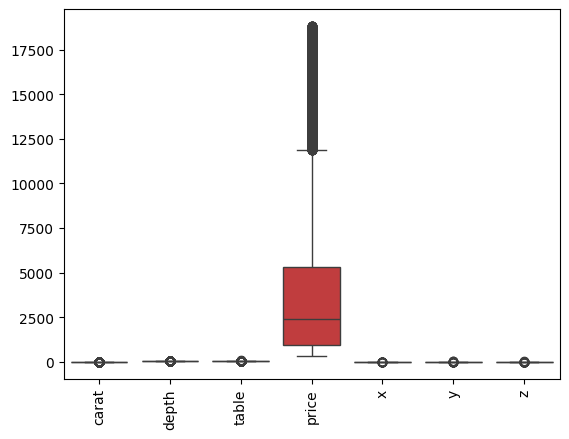

In [3]:
# Display the first 5 rows of the dataset
print(df.head())

# Display the last 5 rows of the dataset
print(df.tail())

# Print 5 random rows of the dataset
print(df.sample(5))

# Print the shape of the dataset
row, col = df.shape
print(f'There are {row} rows and {col} columns in the dataset.')

# Get summary statistics of the dataset
print(df.describe())

# Get information about the dataset
print(df.info())

# Check for null values in the dataset
print(f'There are {df.isnull().sum()} null values in the dataset.')

# Check for duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows in the dataset.')

# Drop unnamed column
df.drop('Unnamed: 0', axis=1, inplace=True)
print(df.head())

# Visualize outliers in the dataset using boxplots
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


From the graph we can see that price have the largest range and also have many outliers comparing to other features.

**1. Univariate Analysis**

Mean: 3932.800
Median: 2401.000
Mode: 605.000
Standard Deviation: 3989.440
Variance: 15915629.424


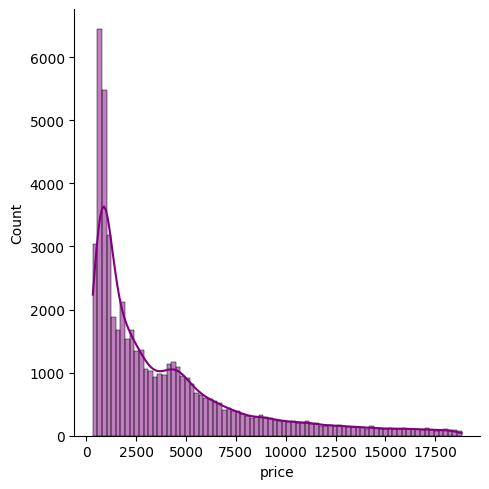

In [4]:
# Find the central tendency and variability (Carat)
mean = df['price'].mean()
median = df['price'].median()
mode = df['price'].mode().values[0]
standard_deviation = df['price'].std()
variance = df['price'].var()

print(f"Mean: {mean:.3f}")
print(f"Median: {median:.3f}")
print(f"Mode: {mode:.3f}")
print(f"Standard Deviation: {standard_deviation:.3f}")
print(f"Variance: {variance:.3f}")

# Visualize the data using a distribution plot (Carat)
sns.displot(df['price'], kde=True, color='purple')


(array([13308.,  6820.,  5207.,  3855.,  2934.,  2539.,  3008.,  2553.,
         1832.,  1535.,  1266.,  1077.,   838.,   815.,   711.,   614.,
          574.,   557.,   455.,   440.,   411.,   371.,   346.,   285.,
          287.,   311.,   265.,   262.,   246.,   218.]),
 array([  326.        ,   942.56666667,  1559.13333333,  2175.7       ,
         2792.26666667,  3408.83333333,  4025.4       ,  4641.96666667,
         5258.53333333,  5875.1       ,  6491.66666667,  7108.23333333,
         7724.8       ,  8341.36666667,  8957.93333333,  9574.5       ,
        10191.06666667, 10807.63333333, 11424.2       , 12040.76666667,
        12657.33333333, 13273.9       , 13890.46666667, 14507.03333333,
        15123.6       , 15740.16666667, 16356.73333333, 16973.3       ,
        17589.86666667, 18206.43333333, 18823.        ]),
 <BarContainer object of 30 artists>)

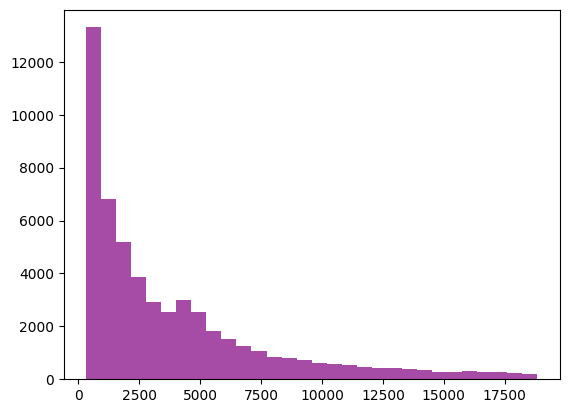

In [5]:
# Create a histogram
plt.hist(df['price'], bins=30, color='purple', alpha=0.7)

In [6]:
# Calculate the skewness
skewness = df['price'].skew()
if skewness > 0:
    print("Positive Skewness: {:.2f}".format(skewness))
elif skewness < 0:
    print("Negative Skewness: {:.2f}".format(skewness))
else:
    print("No Skewness")

Positive Skewness: 1.62


The 'price' column has a positive skewness of 1.62, it suggests that the distribution of prices is right-skewed. In other words, while most diamond prices are on the lower end, there are a significant number of diamonds with exceptionally high prices. These high-priced diamonds are pulling the mean price upwards, making it greater than the median.

<Axes: ylabel='price'>

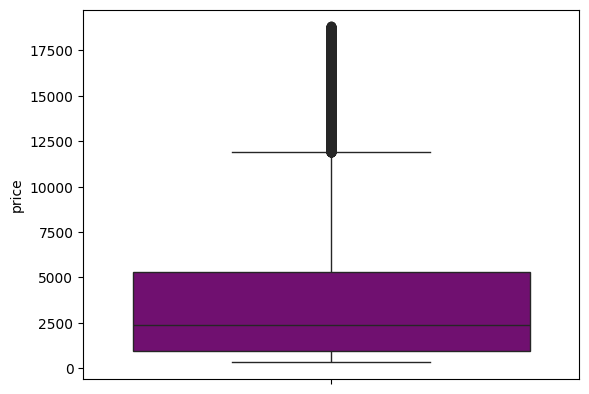

In [7]:
# Box plot of price
sns.boxplot(df['price'], color='purple')

THE box plot of 'price' shows a lot of points beyond the upper whisker (due to the positive skew), it confirms that there are a number of diamonds with prices significantly higher than the rest. This would align with the previous analysis - while most diamonds are cheaper, there are a few exceptionally expensive ones.

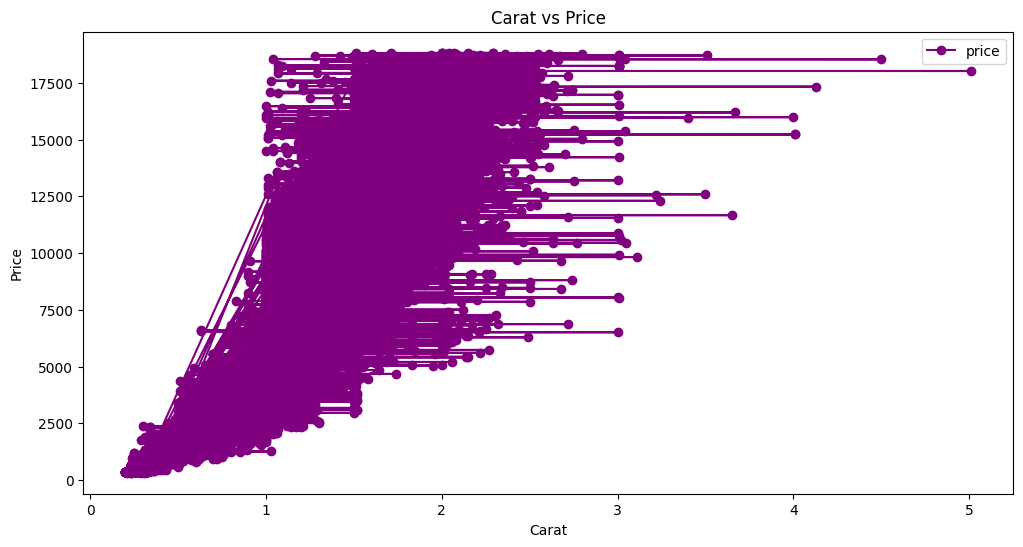

In [8]:
# Line plot for price
df.plot(x='carat', y='price', kind='line', color='purple', figsize=(12, 6), marker='o')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Carat vs Price')
plt.show()


Here we're plotting 'price' against 'carat', and since multiple diamonds can have the same carat weight but different prices (due to differences in other factors like cut, clarity, and color), a line connecting all the points does not represent the data accurately and creates a messy plot.

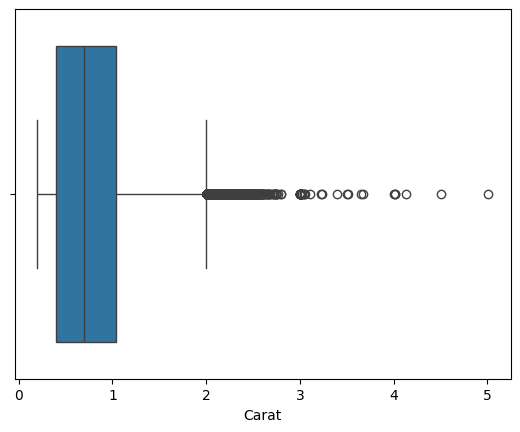

In [9]:
# Boxplot for carat
boxplot_carat = sns.boxplot(data=df, x='carat')

boxplot_carat.set_xlabel('Carat', color="black")
boxplot_carat.tick_params(axis='x', colors='black')

From boxplot we see that the right whisker is longer than left whisker, which means that the data is positivily skewed. Also there is many data points higher than majority of the data (data points greater than upper quartile). The presence of numerous outliers shows that the data have a heavy-tailed distribution.

**2. Bivariate Analysis**

In [10]:
# Price vs Carat
# Correlation Analysis
pearson_corr, _ = stats.pearsonr(df['price'], df['carat'])
print("Pearson Correlation Coefficient: {:.4f}".format(pearson_corr))


Pearson Correlation Coefficient: 0.9216


A Pearson Correlation Coefficient of 0.9216 indicates a very strong positive correlation between the variables 'price' and 'carat'. This suggests that as the 'carat' size of a diamond increases, the 'price' of the diamond also significantly increases.

Pearson Correlation Coefficient: -0.0106


(array([40., 45., 50., 55., 60., 65., 70., 75., 80., 85.]),
 [Text(0, 40.0, '40'),
  Text(0, 45.0, '45'),
  Text(0, 50.0, '50'),
  Text(0, 55.0, '55'),
  Text(0, 60.0, '60'),
  Text(0, 65.0, '65'),
  Text(0, 70.0, '70'),
  Text(0, 75.0, '75'),
  Text(0, 80.0, '80'),
  Text(0, 85.0, '85')])

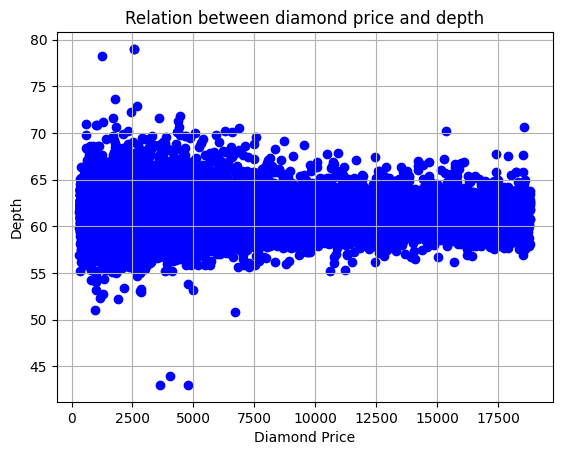

In [11]:
# Price vs Depth
# Correlation Analysis
pearson_corr, _ = stats.pearsonr(df['price'], df['depth'])
print("Pearson Correlation Coefficient: {:.4f}".format(pearson_corr))

plt.scatter(df['price'], df['depth'], color='blue', marker='o')

plt.xlabel('Diamond Price', color='black')
plt.ylabel('Depth', color='black')
plt.title('Relation between diamond price and depth', color='black')
plt.grid(True)
plt.xticks(color='black')
plt.yticks(color='black')


A Pearson Correlation Coefficient of -0.0106 indicates a very weak negative correlation between the variables 'price' and 'depth'. This suggests that as 'depth' increases slightly, 'price' decreases slightly. Also we can see outliers in depth>75 and depth<50, which needs to be capped.

(array([ 40.,  50.,  60.,  70.,  80.,  90., 100.]),
 [Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70'),
  Text(0, 80.0, '80'),
  Text(0, 90.0, '90'),
  Text(0, 100.0, '100')])

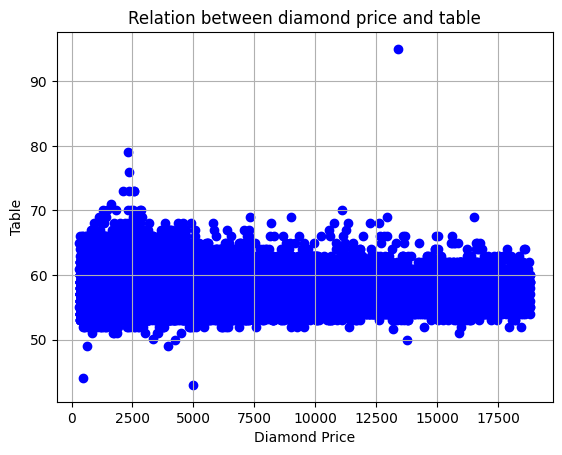

In [12]:
# Relation between table and price.
plt.scatter(df['price'], df['table'], color='blue', marker='o')

plt.xlabel('Diamond Price', color='black')
plt.ylabel('Table', color='black')
plt.title('Relation between diamond price and table', color='black')
plt.grid(True)
plt.xticks(color='black')
plt.yticks(color='black')

We can see clearly from the scatter plot that the relation between table and price is kind of weak. But also there is outliers in table>75 and table<50 (need to be capped)

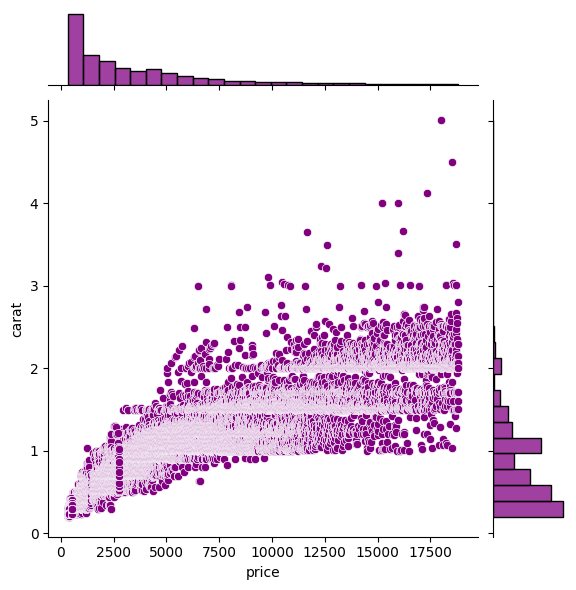

In [13]:
# Joint Plot
sns.jointplot(x='price', y='carat', data=df, kind='scatter', color='purple', marginal_kws=dict(bins=25, fill=True))
plt.show()

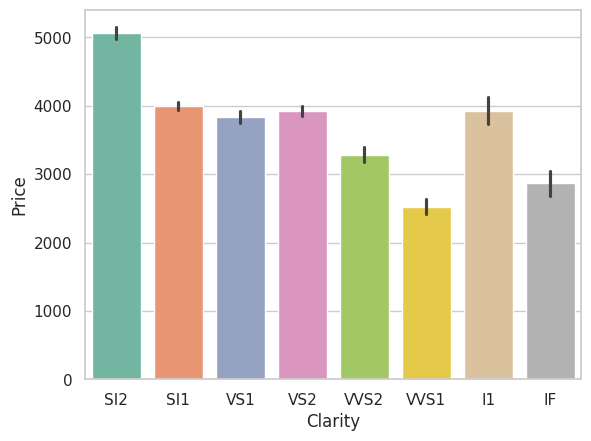

In [14]:
# Grouped bar chart between price and different categories in clarity
sns.set(style="whitegrid")

# Create the catplot
sns.barplot(x=df['clarity'], y=df['price'], hue='clarity', data=df, palette="Set2")

plt.xlabel('Clarity')
plt.ylabel('Price')

# Show the plot
plt.show()

**3. Multivariate Analysis**

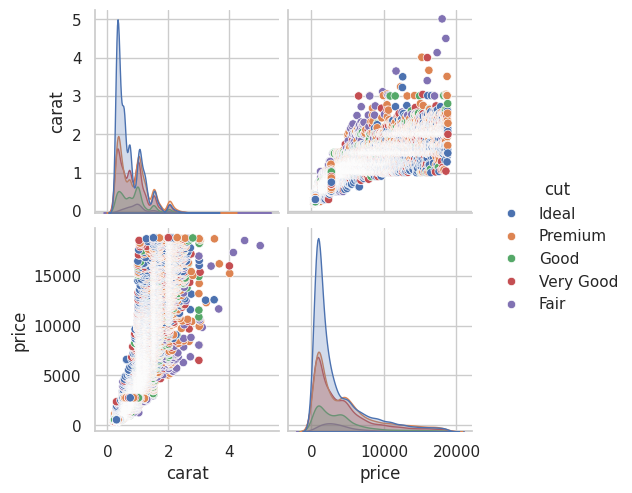

In [15]:
# Pairplot for price, carat and cut
sns.pairplot(df, hue="cut", vars=["carat", "price"])
plt.show()

# Data Cleaning and Preprocessing

### Data Cleaning

In [8]:
# Check number of null values we have
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
None


From out of info() function, we see that our dataset doesn't have any null values.

In [9]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


x, y, and z have minimum "0" which means that there are diamonds with dimensions almost
equal to zero, which could be a missing values in our data.

In [10]:
# Check for zero values in x, y, z.
zeros_x = df[df['x'] == 0]
zeros_y = df[df['y'] == 0]
zeros_z = df[df['z'] == 0]

print("Number of zero values in 'x':", len(zeros_x))
print("Percentage of missing values to whole dataset: ", (len(zeros_x))/(len(df))*100)
print("x rows: \n", zeros_x)

print("\nNumber of zero values in 'y':", len(zeros_y))
print("Percentage of missing values to whole dataset: ", (len(zeros_y))/(len(df))*100)
print("y rows: \n", zeros_y)

print("\nNumber of zero values in 'z':", len(zeros_z))
print("Percentage of missing values to whole dataset: ", (len(zeros_z))/(len(df))*100)
print("z rows: \n", zeros_z)


Number of zero values in 'x': 8
Percentage of missing values to whole dataset:  0.014831294030404153
x rows: 
        Unnamed: 0  carat        cut color clarity  depth  table  price    x  \
11182       11183   1.07      Ideal     F     SI2   61.6   56.0   4954  0.0   
11963       11964   1.00  Very Good     H     VS2   63.3   53.0   5139  0.0   
15951       15952   1.14       Fair     G     VS1   57.5   67.0   6381  0.0   
24520       24521   1.56      Ideal     G     VS2   62.2   54.0  12800  0.0   
26243       26244   1.20    Premium     D    VVS1   62.1   59.0  15686  0.0   
27429       27430   2.25    Premium     H     SI2   62.8   59.0  18034  0.0   
49556       49557   0.71       Good     F     SI2   64.1   60.0   2130  0.0   
49557       49558   0.71       Good     F     SI2   64.1   60.0   2130  0.0   

          y    z  
11182  6.62  0.0  
11963  0.00  0.0  
15951  0.00  0.0  
24520  0.00  0.0  
26243  0.00  0.0  
27429  0.00  0.0  
49556  0.00  0.0  
49557  0.00  0.0  

Numbe

As the number of rows that contain outliers is very small, we can just replace them with mean instead of removing the whole row.

In [11]:
# Replacing zero values (missing values) with mean.
df['x'] = df['x'].replace(0, df['x'].mean())
df['y'] = df['y'].replace(0, df['y'].mean())
df['z'] = df['z'].replace(0, df['z'].mean())

In [12]:
# Check for duplicates
duplicates = df.duplicated(keep=False)

print("Number of duplicaed rows: ", duplicates.sum())
print("Duplicated rows: \n", df[duplicates].sort_values(by=list(df.columns)))


Number of duplicaed rows:  0
Duplicated rows: 
 Empty DataFrame
Columns: [Unnamed: 0, carat, cut, color, clarity, depth, table, price, x, y, z]
Index: []


We have some duplicated rows in our dataset so we will drop them except the first occurance of each duplicated row.

In [13]:
# Drop duplicate rows
df = df.drop_duplicates(keep='first')

In [14]:
# Determine number of outliers in carat
mean_carat = df['carat'].mean()
median_carat = df['carat'].median()
standard_deviation_carat = df['carat'].std()

threshold = 3 * standard_deviation_carat
outliers = (df['carat'] < mean_carat - threshold) | (df['carat'] > mean_carat + threshold)

print("Mean:", mean_carat)
print("Median: ",median_carat)
print("Standard Deviation: ",standard_deviation_carat)
print("Number of outliers:", np.sum(outliers))
print("\n\n", df[outliers])

Mean: 0.7979397478680014
Median:  0.7
Standard Deviation:  0.4740112444054184
Number of outliers: 439


        Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
13757       13758   2.22       Fair     J      I1   66.7   56.0   5607  8.04   
14138       14139   2.27       Fair     J      I1   67.6   55.0   5733  8.05   
15684       15685   2.49       Fair     J      I1   66.3   58.0   6289  8.26   
16283       16284   3.00  Very Good     H      I1   63.1   55.0   6512  9.23   
16439       16440   2.22       Fair     H      I1   70.1   55.0   6564  7.77   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
27727       27728   2.61      Ideal     I     SI2   62.1   56.0  18756  8.85   
27731       27732   2.55    Premium     I     VS1   61.8   62.0  18766  8.70   
27739       27740   2.80       Good     G     SI2   63.8   58.0  18788  8.90   
27744       27745   2.29    Premium     I     SI1   61.8   59.0  18797  8.52   
27749       277

We determined the number of outliers in carat column (as we say before in box plot that it has many outliers). We chose the threshold to be 3 above/below standard deviation away from the mean.

In [15]:
q1 = df['carat'].quantile(0.25)
q3 = df['carat'].quantile(0.75)
iqr = q3 - q1

upper_whisker = q3 + 1.5 * iqr
upper_bound_rows = df[df['carat'] == upper_whisker]

print(upper_bound_rows)

       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
11634       11635    2.0    Premium     J      I1   61.5   59.0   5051  8.11   
13929       13930    2.0       Fair     I      I1   66.0   60.0   5667  7.78   
14645       14646    2.0       Fair     H      I1   69.8   54.0   5914  7.60   
15861       15862    2.0    Premium     H      I1   59.7   62.0   6344  8.19   
16298       16299    2.0       Good     J      I1   63.6   62.0   6521  7.97   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
27683       27684    2.0  Very Good     E     SI1   60.5   59.0  18709  8.09   
27729       27730    2.0  Very Good     F     SI1   57.9   60.0  18759  8.28   
27743       27744    2.0    Premium     I     VS1   60.8   59.0  18795  8.13   
27745       27746    2.0  Very Good     H     SI1   62.8   57.0  18803  7.95   
27748       27749    2.0  Very Good     G     SI1   63.5   56.0  18818  7.90   

          y     z  
11634  8.06  4.97  

We can see the the price of carat exactly on upper bound is almost the same as price of the carat outliers. So we can just adjust all outlier  values to upper bound value.

In [16]:
# We adjusted the values above upper whisker to the upper bound value.
df.loc[df['carat'] > upper_whisker, 'carat'] = upper_whisker

Text(0.5, 1.0, 'Correlation Heatmap')

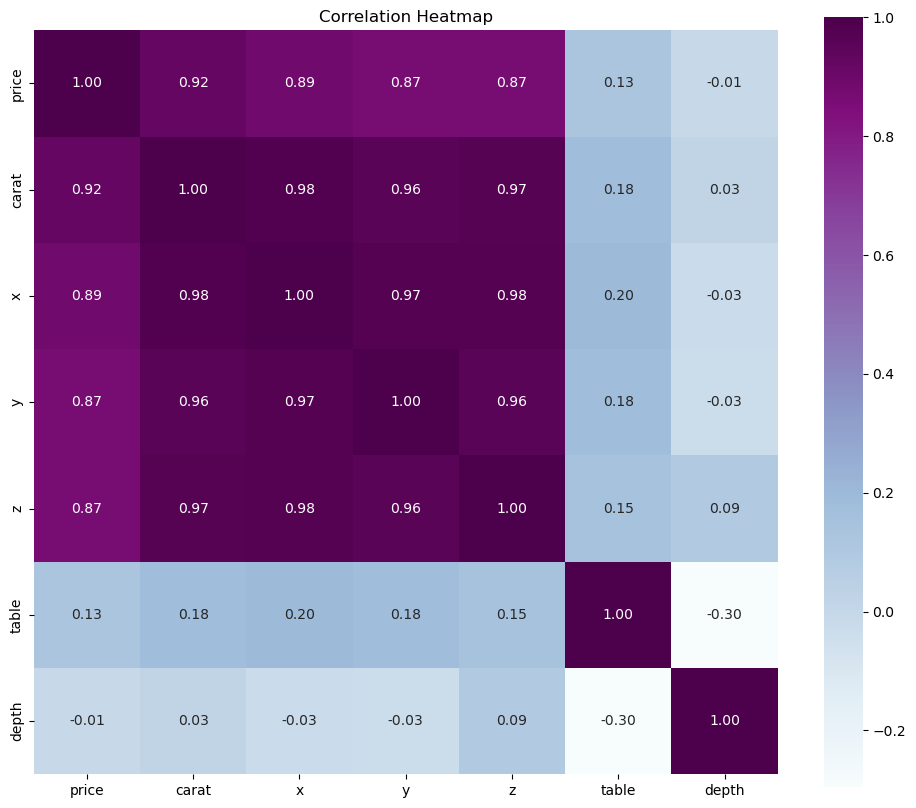

In [17]:
selected_columns = ['price','carat','x', 'y', 'z', 'table', 'depth']
correlation_matrix = df[selected_columns].corr(method='pearson')
round(correlation_matrix, 2)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='BuPu', annot=True, fmt=".2f", square=True)
plt.title("Correlation Heatmap")


From the pairplot we see that carat, x, y, z have a big impact on our target variable which is price, while on the other hand table and depth have a low impact on diamond price.

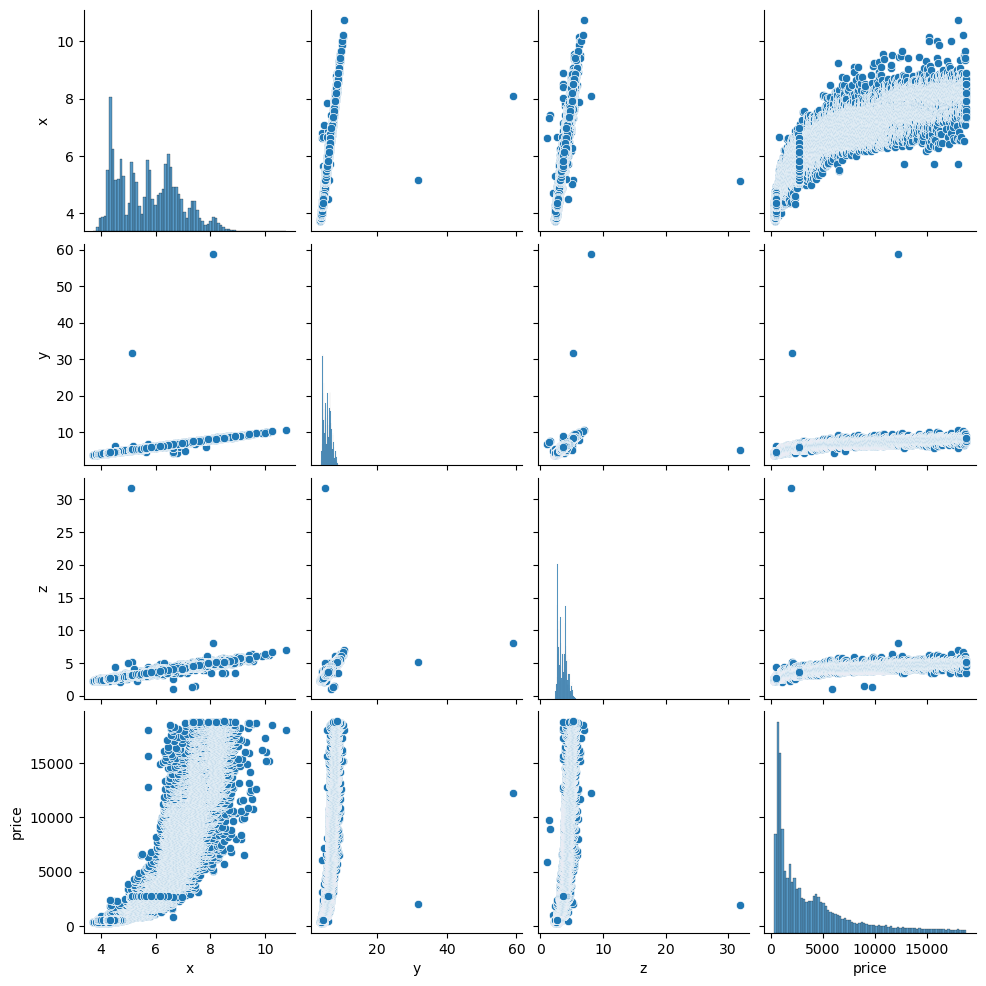

In [18]:
# import seaborn as sns

df_xyz_price = df[['x', 'y', 'z', 'price']]

# Create a pairplot
sns.pairplot(df_xyz_price)
plt.show()

In [19]:
# Drop rows with x > 10
df = df[df['x'] < 10]


# Replace outliers in y, z with mean.
df.loc[df['y']>20, 'y'] = df['y'].mean()
df.loc[df['z']>10, 'z'] = df['z'].mean()
# Drop y, z.
# test_data = df # This data is for comparing
# df = df.drop(columns=['y', 'z'])

Now we will cap rows that have (depth>=75) or (depth<=50) or (table>=75) or (table<=50) as they contain outliers as we saw in analysis stage [block 11, 12].

In [20]:
# df = df [df['depth'] < 75]
# df = df [df['depth'] > 50]
# df = df [df['table'] < 75]
# df = df [df['table'] > 50]

df.loc[df['depth']>=75, 'depth'] = df['depth'].mean()
df.loc[df['depth']<=50, 'depth'] = df['depth'].mean()
df.loc[df['table']>=75, 'table'] = df['table'].mean()
df.loc[df['table']<=50, 'table'] = df['table'].mean()

# df = df.drop(columns=['table', 'depth'])


### Data Transformation

In [21]:
le = LabelEncoder()
enc = OneHotEncoder(handle_unknown='ignore')

df = pd.get_dummies(df, prefix=['cut'], columns = ['cut'], drop_first=True)
df = pd.get_dummies(df, prefix=['color'], columns = ['color'], drop_first=True)
df = pd.get_dummies(df, prefix=['clarity'], columns = ['clarity'], drop_first=True)
print(df.head())

   Unnamed: 0  carat  depth  table  price     x     y     z  cut_Good  \
0           1   0.23   61.5   55.0    326  3.95  3.98  2.43     False   
1           2   0.21   59.8   61.0    326  3.89  3.84  2.31     False   
2           3   0.23   56.9   65.0    327  4.05  4.07  2.31      True   
3           4   0.29   62.4   58.0    334  4.20  4.23  2.63     False   
4           5   0.31   63.3   58.0    335  4.34  4.35  2.75      True   

   cut_Ideal  ...  color_H  color_I  color_J  clarity_IF  clarity_SI1  \
0       True  ...    False    False    False       False        False   
1      False  ...    False    False    False       False         True   
2      False  ...    False    False    False       False        False   
3      False  ...    False     True    False       False        False   
4      False  ...    False    False     True       False        False   

   clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0         True        False        False         Fa

Here we applied hot encoding method to encode all categorical attribures to numerical to ease model training.

In [22]:
print(df.columns)

Index(['Unnamed: 0', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')


Text(0.5, 1.0, 'Correlation Heatmap')

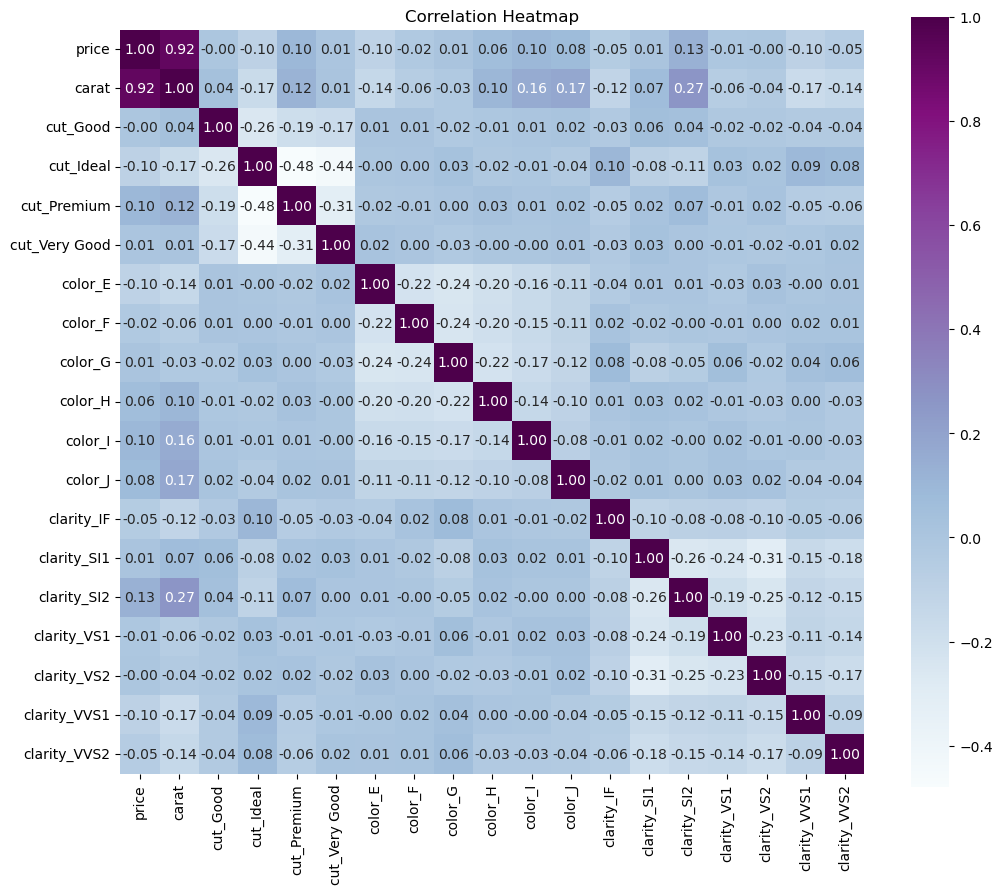

In [23]:
selected_columns = ['price','carat','cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2']
correlation_matrix = df[selected_columns].corr(method='pearson')
round(correlation_matrix, 2)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='BuPu', annot=True, fmt=".2f", square=True)
plt.title("Correlation Heatmap")

From the graph we conclude that purple colored relation is a strong positive relation, while white colored relation is a strong negative relation. And the blue colored relation is too weak negative relation. And columns like cut_Good and clarity_VS2 have almost no impact on the target variable.

In [24]:
price_correlation = df.corrwith(df['price'])

# Format the correlation coefficients to two decimal places
formatted_correlation = price_correlation.apply(lambda x: float(f"{x:.2f}"))

# Check if any correlation coefficients meet the condition
if (formatted_correlation.abs() < 0.01).any():
    # Filter the column names where the correlation with 'price' is close to 0
    filtered_columns = formatted_correlation[formatted_correlation.abs() < 0.01]
    filtered_columns_list = list(filtered_columns.index)
    print("Column names with correlation close to 0 with 'price':")
    print(filtered_columns_list)

Column names with correlation close to 0 with 'price':
['cut_Good', 'clarity_VS2']


Now we will save another copy of the data but with deleted columns which have zero correlation with our target variable.

In [25]:
data_with_dropped_columns = df.drop(columns=filtered_columns_list)

Now we will scall all our data between 0 and 1, so we improve converge efficiency in models that uses gradient decent.

In [26]:
scaler = MinMaxScaler()
data = df.values
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

### Splitting Data to Training/Testing Sets.

In [27]:
# scaler = MinMaxScaler()
# data = df.values
# scaled_data = scaler.fit_transform(data)
# scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

X = scaled_df.drop('price', axis=1)
y = scaled_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

print("X: \n", X.head())
print("y: \n", y.head())


# We will also have the data with dropped columns
data2 = data_with_dropped_columns.values
scaled_data2 = scaler.fit_transform(data2)
scaled_df2 = pd.DataFrame(scaled_data2, columns=data_with_dropped_columns.columns)
X2 = scaled_df2.drop('price', axis=1)
y2 = scaled_df2['price']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, train_size=0.8, random_state=42)

X: 
    Unnamed: 0     carat     depth     table         x         y         z  \
0    0.000000  0.016667  0.469298  0.213974  0.035889  0.048940  0.194564   
1    0.000019  0.005556  0.394737  0.475983  0.026101  0.026101  0.177396   
2    0.000037  0.016667  0.267544  0.650655  0.052202  0.063622  0.177396   
3    0.000056  0.050000  0.508772  0.344978  0.076672  0.089723  0.223176   
4    0.000074  0.061111  0.548246  0.344978  0.099511  0.109299  0.240343   

   cut_Good  cut_Ideal  cut_Premium  ...  color_H  color_I  color_J  \
0       0.0        1.0          0.0  ...      0.0      0.0      0.0   
1       0.0        0.0          1.0  ...      0.0      0.0      0.0   
2       1.0        0.0          0.0  ...      0.0      0.0      0.0   
3       0.0        0.0          1.0  ...      0.0      1.0      0.0   
4       1.0        0.0          0.0  ...      0.0      0.0      1.0   

   clarity_IF  clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  \
0         0.0          0.0          

We split our data to 80% training set and 20% testing set.

# Model Selection & Training

### Linear Regression Model

Linear regression is a popular supervised learning technique used for predicting a continuous output variable based on one or more input features. Here's why it's suitable for applying to the Diamonds dataset:

- **Continuous Target Variable**: The target variable in this dataset is the price of a diamond, which is a continuous value (e.g., $1000, $2000, etc.). Therefore, linear regression is a fitting choice.

- **Linear Relationship**: Linear regression models seek a linear relationship between the input features and the target variable (price).

- **Assumptions of Linear Regression**: Linear regression assumes a linear relationship between the input features and the target variable. It also presumes that the errors (residuals) are normally distributed and have constant variance.

- **Interpretability**: Linear regression yields interpretable coefficients, allowing us to understand how each feature contributes to the predicted price.

In [28]:
# Scaling the data
scaler1 = StandardScaler()
scaler2 = StandardScaler()

X_train_scaled = scaler1.fit_transform(X_train)
X_test_scaled = scaler1.transform(X_test)

X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)


In [29]:
# Create an instance of the Linear Regression model
lr_model1 = LinearRegression()

# Fit the model on the training data
lr_model1.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred1 = lr_model1.predict(X_test_scaled)

# Calculate the mean squared error
mse1 = mean_squared_error(y_test, y_pred1)
print("Mean Squared Error:", mse1)

#This varablie will be used in the conclusion
lr_model_test_error= mse1


Mean Squared Error: 0.0033866994899686563


Next, we will perform linear regression using features that have almost zero correlation with the price.

In [30]:
lr_model2 = LinearRegression()

# Fit the model on the training data
lr_model2.fit(X2_train_scaled, y2_train)

# Make predictions on the test data
y2_pred = lr_model2.predict(X2_test_scaled)

# Calculate the mean squared error
mse2 = mean_squared_error(y2_test, y2_pred)
print("Mean Squared Error:", mse2)

#This varablie will be used in the conclusion
lr_model_test_error2 =  mse2

Mean Squared Error: 0.0038676530252164942


### Ensemble Model

We used Gradiebt Boosting as our ensemble model because :

1- Our data is not very complex. The dataset size is considered mid, and the number of features is small (dimentionality not high). In addition that more than 4 features don't affect the price (target).


2- Feature types are not complex. Most of them are numeric, and the categorical we have encoded them to be numerical.

3- Boosting give us better accuracy (what we are aiming for), and have better performance. In addition, it reduce bias.

In [31]:
gb_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.2, max_depth=6, random_state=42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

#This varablie will be used in the conclusion
gb_model_test_error=mse

# Print the mean squared error
print("Mean Squared Error:", mse)

Mean Squared Error: 2.0218876576074748e-06


Now we will do gradient boosting with some faetures that have correlation almost zero with price.

In [32]:
gb_model2 = GradientBoostingRegressor(n_estimators=300, learning_rate=0.2, max_depth=6, random_state=42)
gb_model2.fit(X2_train, y2_train)
y2_pred = gb_model2.predict(X2_test)
mse2 = mean_squared_error(y2_test, y2_pred)

#This varablie will be used in the conclusion
gb_model_test_error2= mse2

print("Mean Squared Error:", mse2)

Mean Squared Error: 2.207785395548869e-06


As we can see the mse is much more higher when we used data with dropped columns. We can conclude that these columns alone might not have a direct impact on target variable, but it might have an impact on price when its combined with another features in the data.

#### Optmizing the Model

In [ ]:
params = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.2],
    'max_depth': [3, 5, 6]
}

grid_search = GridSearchCV(gb_model, params, cv=5 , n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

As we can see from the results best hyperparameters were: ['learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300], which is almost the same as hyperparameters we used in first Gradient Boosting Model. The only difference is that we should have decreased learning rate from 0.2 to 0.1 to get better results.

- Traning the data with the optmized Hyperparameters

In [43]:
gb_model_opt = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42)
gb_model_opt.fit(X_train, y_train)
y_pred = gb_model_opt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

#This varablie will be used in the conclusion
gb_model_test_error_opt=mse

# Print the mean squared error
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0008952769841428333


### Neural Network Model (Deep Learning)

Accourding to our dataset structure and the task we want to achive using an ANN model will be the most appropriate choice. Because ANN can handle both numerical and categorical featuers effectively making it the best for prediectiong the diamond price.

- ANN Architecture

In [45]:
# ANN model class
class ANN(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes):
        super(ANN, self).__init__()
        self.hidden_layers = nn.ModuleList([nn.Linear(input_size, hidden_sizes[0])])
        for i in range(len(hidden_sizes) - 1):
            self.hidden_layers.extend([nn.Linear(hidden_sizes[i], hidden_sizes[i+1])])
        self.output_layer = nn.Linear(hidden_sizes[-1], num_classes)
        # self.dropout = nn.Dropout(dropout_prob)  # Dropout layer

    def forward(self, x):
        for layer in self.hidden_layers:
            x = torch.relu(layer(x))
        out = self.output_layer(x)
        return out

- ANN class defines the structure of the artificial neural network.
- forward method defines the forward pass of the network.


- Prepearing Dataset for PyTorch

In [46]:
# Convert numpy arrays to PyTorch tensors (All featuers)
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Convert numpy arrays to PyTorch tensors (selected featuers)
X2_train_tensor = torch.tensor(X2_train_scaled,dtype=torch.float32)
y2_train_tensor = torch.tensor(y2_train.values, dtype=torch.float32).view(-1, 1)
# print(X2_train_tensor.shape) ; print(y2_train_tensor.shape)
X2_test_tensor = torch.tensor(X2_test_scaled, dtype=torch.float32)
y2_test_tensor = torch.tensor(y2_test.values, dtype=torch.float32).view(-1, 1)


# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_dataset2 = TensorDataset(X2_train_tensor, y2_train_tensor)
test_dataset2 = TensorDataset(X2_test_tensor, y2_test_tensor)


# Data loader (all featuers and labels)
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=64,
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset,
                         batch_size=64,
                         shuffle=False)

# Data loader (selected features)
train_loader2 = DataLoader(dataset=train_dataset2,
                          batch_size=64,
                          shuffle=True)

test_loader2 = DataLoader(dataset=test_dataset2,
                         batch_size=64,
                         shuffle=False)

- Function for the testing

In [47]:
# Define a function to calculate the test loss
def test(model, criterion, dataloader, device):
    model.eval()  # Set the model to evaluation mode
    test_loss = 0.0
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)

    test_loss /= len(dataloader.dataset)
    return test_loss

- In The next couple parts we used the GPU to compute it faster , and to do so we added are the needed code that will check if the device we are using have a GPU and run on it if exists , and In our case we used "Google Collab" to run our model on the GPU. 

    And we have a statmeant that checks that at the end of the code too.

- ALL featuers ANN model training

Epoch [1/10], Step [100/673], Loss: 0.0050
Epoch [1/10], Step [200/673], Loss: 0.0019
Epoch [1/10], Step [300/673], Loss: 0.0032
Epoch [1/10], Step [400/673], Loss: 0.0014
Epoch [1/10], Step [500/673], Loss: 0.0022
Epoch [1/10], Step [600/673], Loss: 0.0009
Epoch [2/10], Step [100/673], Loss: 0.0015
Epoch [2/10], Step [200/673], Loss: 0.0008
Epoch [2/10], Step [300/673], Loss: 0.0034
Epoch [2/10], Step [400/673], Loss: 0.0012
Epoch [2/10], Step [500/673], Loss: 0.0014
Epoch [2/10], Step [600/673], Loss: 0.0020
Epoch [3/10], Step [100/673], Loss: 0.0026
Epoch [3/10], Step [200/673], Loss: 0.0019
Epoch [3/10], Step [300/673], Loss: 0.0011
Epoch [3/10], Step [400/673], Loss: 0.0007
Epoch [3/10], Step [500/673], Loss: 0.0009
Epoch [3/10], Step [600/673], Loss: 0.0020
Epoch [4/10], Step [100/673], Loss: 0.0009
Epoch [4/10], Step [200/673], Loss: 0.0005
Epoch [4/10], Step [300/673], Loss: 0.0014
Epoch [4/10], Step [400/673], Loss: 0.0014
Epoch [4/10], Step [500/673], Loss: 0.0021
Epoch [4/10

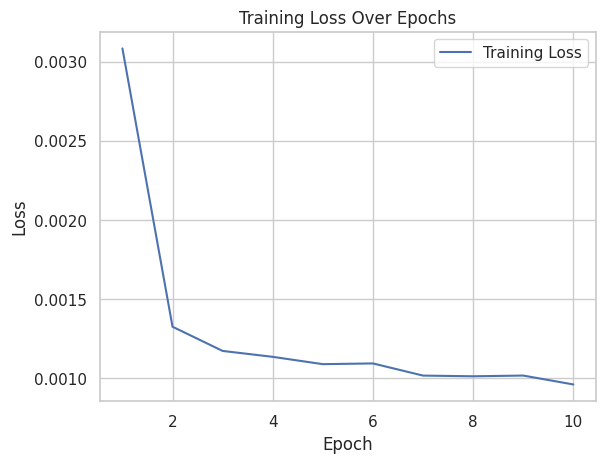

In [48]:
# Create an instance of our ANN model
torch.manual_seed(41)
input_size = X_train_scaled.shape[1]  # Number of features
hidden_sizes = [128,64]  # Hidden layers sizes
num_classes = 1  # Regression task, so only 1 output neuron
# Define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Define your model
model = ANN(input_size, hidden_sizes, num_classes)
model.to(device)

# Define num_epochs
num_epochs = 10

# Lists to store loss values
train_losses = []

# Loss function and optimizer
loss_fn = nn.MSELoss()
# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
for epoch in range(num_epochs):
    epoch_losses = []
    for i, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = loss_fn(outputs, targets)
        epoch_losses.append(loss.item())

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print every 100 steps
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    # Average loss for the epoch
    train_loss = sum(epoch_losses) / len(epoch_losses)
    train_losses.append(train_loss)


print("Is model on GPU? ", next(model.parameters()).is_cuda)
# Plot the training loss
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()



- An instance of the model is created with the specified input size, hidden - layer sizes, and number of classes (1 for regression).
- Loss function is defined (MSELoss for regression) and optimizer is set up (Adam optimizer).

- We tried to train with 100 epochs and we plotted the loss fuctions so we can get the best epoch number for us and don't run it for long with no resnable enhance in the traning and this was the output , and accourding to the graph we will run around 10 to 15 epcohs will be good
------
![loss function representation](output.png)


- ALL featuers ANN model testing

In [49]:
# Calculate test loss
test_loss = test(model, loss_fn, test_loader, device)

#will use this varaiable in the conclusion
ann_test_loss = test_loss

# Print test loss
print(f'Test Loss: {test_loss:.4f}')

Test Loss: 0.0009


- Selected Featuers ANN model

with this model we suffered from getting good improvemts in the loss function in each epoch it was so random so we experiment different hyperparameters , although we tried all these compinations we weren't able to get really got reslults with this model:
- Number of hidden layer:
we tried having 6,5,4, 3, and 2 hidden layers to get better results
- Hidden Layer Sizes:
Tried different combinations of hidden layer sizes:
(128, 64)
(256, 128)
(64, 32)
(128, 32)

- Learning Rate:
Experiment with different learning rates.we tried values like 0.1, 0.01,0.001 and 0.0001.

- Regularization:
Apply regularization techniques like dropout or L2 regularization to prevent overfitting and improve generalization


Epoch [1/4], Step [100/673], Loss: 0.0903
Epoch [1/4], Step [200/673], Loss: 0.0721
Epoch [1/4], Step [300/673], Loss: 0.0721
Epoch [1/4], Step [400/673], Loss: 0.0625
Epoch [1/4], Step [500/673], Loss: 0.0827
Epoch [1/4], Step [600/673], Loss: 0.0664
Epoch [2/4], Step [100/673], Loss: 0.0551
Epoch [2/4], Step [200/673], Loss: 0.0750
Epoch [2/4], Step [300/673], Loss: 0.0540
Epoch [2/4], Step [400/673], Loss: 0.0509
Epoch [2/4], Step [500/673], Loss: 0.0673
Epoch [2/4], Step [600/673], Loss: 0.0772
Epoch [3/4], Step [100/673], Loss: 0.0744
Epoch [3/4], Step [200/673], Loss: 0.0442
Epoch [3/4], Step [300/673], Loss: 0.0696
Epoch [3/4], Step [400/673], Loss: 0.0554
Epoch [3/4], Step [500/673], Loss: 0.0706
Epoch [3/4], Step [600/673], Loss: 0.0448
Epoch [4/4], Step [100/673], Loss: 0.0813
Epoch [4/4], Step [200/673], Loss: 0.0845
Epoch [4/4], Step [300/673], Loss: 0.0809
Epoch [4/4], Step [400/673], Loss: 0.0701
Epoch [4/4], Step [500/673], Loss: 0.0597
Epoch [4/4], Step [600/673], Loss:

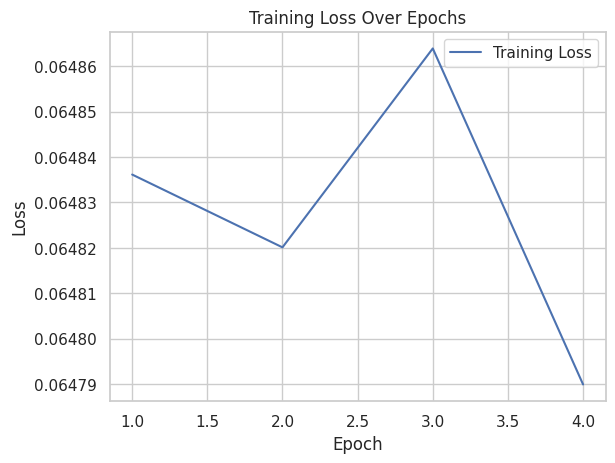

In [50]:
# Create an instance of our ANN model
torch.manual_seed(41)
input_size = X2_train_scaled.shape[1]  # Number of features
hidden_sizes = [128,64]  # Hidden layers sizes
num_classes = 1  # Regression task, so only 1 output neuron
# Define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Define your model
model2 = ANN(input_size, hidden_sizes, num_classes)
model2.to(device)

# Define num_epochs
num_epochs = 4

# Lists to store loss values
train_losses = []

# Loss function and optimizer
loss_fn = nn.MSELoss()
# Define your optimizer with L2 regularization (weight decay)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)

# Train the model
for epoch in range(num_epochs):
    epoch_losses = []
    for i, (inputs, targets) in enumerate(train_loader2):
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass
        outputs = model2(inputs)
        loss = loss_fn(outputs, targets)
        epoch_losses.append(loss.item())

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print every 100 steps
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    # Average loss for the epoch
    train_loss = sum(epoch_losses) / len(epoch_losses)
    train_losses.append(train_loss)

    # Print every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {train_loss:.4f}')

print("Is model on GPU? ", next(model.parameters()).is_cuda)
# Plot the training loss
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

- We started our train with 10 epochs like the other model but we found that our loss fluctuates from one epoch to another so we made many changes in the layers and this was the best we could get
------
![loss function fluctuates representation](output2.png)

- Observation:

Accourding to our observation we think this model is suffering from underfitting, since it is bad in both training phase and testing phase , and accourding to our studies to address this issue we need to add complixety to our model so it can caputer more of the featuers , one of the solutions since it is a NN model is to add hidden layers , or add nodes in the layers and the both options was tried by us with different compination and didn't help anyway to improve the model, So we conclude that we need to add more feateaures so it can capture more complixity.

And when doing this it seems like going back to the first ANN model since this model was a trial from us to see if the model can be enhanced by selecting importan featuers.

So we conclude that in our case selecting features won't help and we need to go with all featuers model.

- Selected featuers ANN model testing

In [51]:
# Calculate test loss
test_loss = test(model2, loss_fn, test_loader2, device)

# Print test loss
print(f'Test Loss: {test_loss:.4f}')

#will use this varaiable in the conclusion
ann_test_loss2 = test_loss

Test Loss: 0.0626


- ANN model optmization and tuning the hyperparameters

In this part we try different hyperparametrs compinations to see if we could get better reults , note that we will work on the modle that have all the features since the secound one couldn't give us good reuslts although we tried in it a lot

This Comment Code was our trials to do a better way of optmization by using the Grid Serach and we manage to write the needed code but we suffered a lot with installing "skorch" in the right way and we need this library because since we are using PyTorch for making our ANN model we need to wrap it with something called "NeuralNetClassifier" to be able to use the Grid Search build in functions that are avaiable in "sklearn".

Overall our plan was to optmiza the best two Model we had which was ANN and GB (with all featuers ) and we did GB using grid up and did ANN manually in the old fashion way!

In [ ]:
# # create model with skorch
# model = NeuralNetClassifier(
#     ANN,
#     criterion=nn.MSELoss,
#     optimizer=optim.Adam,
#     verbose=False
# )

# # define the grid search parameters
# param_grid = {
#     'epochs': [10,20,30],
#     'batch_size': [32,64,128],
#     'learning_rate': [0.001,0.01,0.1],
#     'optimizer': ['adam', 'sgd'],
#     'hidden_sizes' : [[64,32],[128,64],[256,128]]
# }
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X, y)

# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

# import torch
# from torch import nn, optim
# from sklearn.model_selection import GridSearchCV

# # Wrap your PyTorch model in a skorch NeuralNetClassifier
# net = NeuralNetClassifier(
#     MyPyTorchModel,
#     max_epochs=10,  # Example hyperparameters
#     lr=0.01         # Example hyperparameters
# )

# # Define hyperparameters grid
# param_grid = {
#     'hidden_sizes': [[64,32],[128,64],[256,128]],
#     'batch_size': [32, 64, 128],
#     'learning_rate': [0.001, 0.01, 0.1]

# }

# # Use GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3 , n_jobs=-1)

# # Convert tensors to numpy arrays
# X_train_numpy = X_train_tensor.numpy()
# y_train_numpy = y_train_tensor.numpy().squeeze()  # Squeeze to remove extra dimension


# # Fit the grid search to your data
# grid_search.fit(X_train_numpy, y_train_numpy)

# # Print the best hyperparameters and their corresponding score
# print("Best hyperparameters found: ", grid_search.best_params_)
# print("Best accuracy found: ", grid_search.best_score_)



# Conclusion & Observations

### Compare and repersent the 6 models we have using the MSE value of each one of them on the testing set

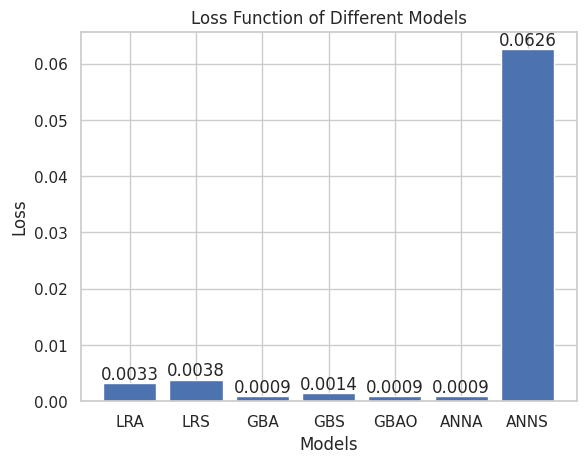

In [55]:
# Function to plot the loss function
def plot_loss_function(models, loss_values):
    plt.bar(models, loss_values)
    plt.xlabel('Models')
    plt.ylabel('Loss')
    plt.title('Loss Function of Different Models')
    for i, v in enumerate(loss_values):
        plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')
    plt.show()

# Define the values
#'Linear Regression Model -All Features-' : LRA
#'Linear Regression Model -Selected Features-' : LRS'
#Gradient Boosting Regressor Model -All Features-' : GBA
#'Gradient Boosting Regressor Model -Selected Features-'
#'ANN Model -All Features-': ANNA
#'ANN Model -Selected Features-' :ANNS
# Gradient Boosting Regressor Model -All Features-' Optimized Version : GBAO
models = ['LRA', 'LRS','GBA', 'GBS','GBAO', 'ANNA','ANNS']
loss_values = [lr_model_test_error, lr_model_test_error2, gb_model_test_error, gb_model_test_error2,gb_model_test_error_opt, ann_test_loss, ann_test_loss2]

plot_loss_function(models, loss_values)


Following the evaluation of various models based on their loss function values, it is apparent that both the Artificial Neural Network (ANN) Model with all features (ANNA) and the Gradient Boosting Regressor Model with all features (GBA) exhibit comparable performance, showcasing minimal loss functions. However, when considering the practical deployment of these models, it becomes evident that the Gradient Boosting Regressor Model (GBA) holds an edge over the Artificial Neural Network (ANN) Model (ANNA) due to its superior computational efficiency.

Despite their similar performance in minimizing loss, the GBA model offers a more feasible solution, particularly in scenarios where computational complexity and resource utilization are significant concerns.

Therefore, while both ANNA and GBA present competitive performance in terms of loss function, opting for the GBA model ensures not only excellent predictive accuracy but also mitigates computational overhead, making it the preferred choice for practical implementation in real-world applications.

We added later the optmized version of the Gradient Boosting Regressor Model (the differnce than our was the learning rate = 0.01 insted of 0.02) but the changes was so minor , that made it have almost the same MSE value.